In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


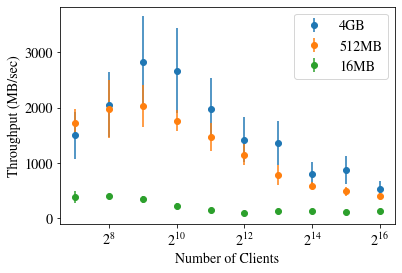

In [2]:
# NAIVE BRIDGES PLOT
output1 = 'basic-chare-benchmarks/bridges/results/512MB_32tasks_16nodes/summary.out'
output2 = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
output3 = 'basic-chare-benchmarks/bridges/results/16MB_32tasks_16nodes/summary.out'


fig, ax = plt.subplots()

file = output2
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#Clients', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
dataframe = dataframe[dataframe['#Clients'] >= 2**7]
dataframe = dataframe[dataframe['#Clients'] <= 2**16]
dataframe['Time'] = dataframe.iloc[:, 1:].mean(axis=1)
dataframe['TP'] = 4 * 1024 / dataframe['Time']
plt.errorbar(dataframe['#Clients'], dataframe['TP'], yerr=dataframe.iloc[:, 1:].std(axis=1), fmt='o')

file = output1
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#PEs', 'Clients', 'Time']
dataframe['TP'] = 512 / dataframe['Time']
 
grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
ax.errorbar(grouped.index, grouped['TP']['mean'], yerr=grouped['TP']['std'], fmt='o')


file = output3
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#PEs', 'Clients', 'Time']
dataframe['TP'] = 16 / dataframe['Time']
 
grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
ax.errorbar(grouped.index, grouped['TP']['mean'], yerr=grouped['TP']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)

ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Throughput (MB/sec)')
plt.legend([ '4GB', '512MB', '16MB'])
plt.savefig('figures/bridges_naive.pdf', bbox_inches='tight', format='pdf')

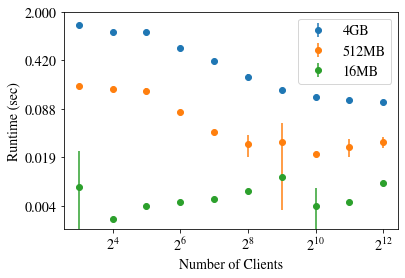

In [3]:
# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out"
output2 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks512MB.out"
output3 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks16MB.out"

fig, ax = plt.subplots()

for file in [output1, output2, output3]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Clients', 'Time']
    
    grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_yticks(np.logspace(-8, 1, num = 5, base=2))
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
plt.legend(['4GB', '512MB', '16MB'])

/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


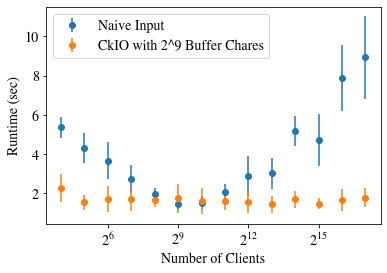

In [4]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
ckio_file = 'ckio-benchmarks/old-results/bridges/16nodes-32tasks-4GB-2^9BC.out'


# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])
plt.savefig('4gb-bridges-ckio-naive.pdf', bbox_inches='tight', format='pdf')

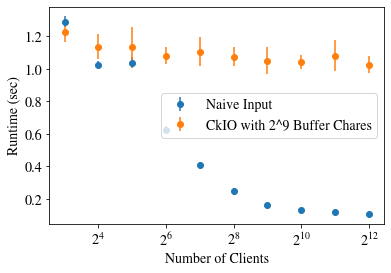

In [7]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO on FRONTIER

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out'
ckio_file = 'ckio-benchmarks/frontier/results/vary-clients-16nodes512tasks2^6bc.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['PEs', 'clients', 'time']
grouped = summary_data.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['clients', 'bc', 'pes', 'size', 'bg', 'time']
grouped = ckio_summary.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# plot setup
plt.xscale('log', base=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

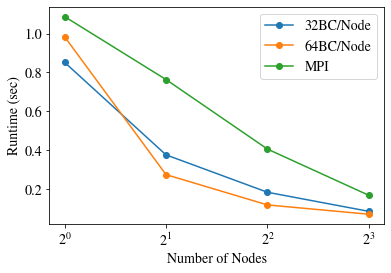

In [8]:
# MPI COMPARISON WITH CKIO

mpi = "mpi-benchmarks/mpi-1GB-32tpn.txt"
ckio = "ckio-benchmarks/32tpn.out"

mpidf = pd.read_csv(mpi, sep=' ', header=None, names=['nnodes', 'npes', 'size', 'time'])
ckiodf = pd.read_csv(ckio, sep=' ', header=None, names=['nreaders', 'nbc', 'npes', 'nnodes', 'filesize', 'bgtime', 'time'])

ckiodf['bcpernode'] = ckiodf['nbc'] / ckiodf['nnodes']
fig, ax = plt.subplots()

# plot ckio
range = [32, 64]
for bc in range:
    data = ckiodf[ckiodf['bcpernode'] == bc]
    grouped = data.groupby('nnodes').agg(['mean', 'std'])
    
    ax.plot(grouped.index, grouped['time']['mean'], marker='o')
    
# plot mpi
grouped = mpidf.groupby('nnodes').agg(['mean', 'std'])
ax.plot(grouped.index, grouped['time']['mean'], marker='o')

plt.legend(['32BC/Node', '64BC/Node', 'MPI'])

plt.xscale('log', base=2)
plt.xlabel('Number of Nodes')
plt.ylabel('Runtime (sec)')

plt.savefig('ckio-mpi.pdf', bbox_inches='tight', format='pdf')


0.22084466666666658


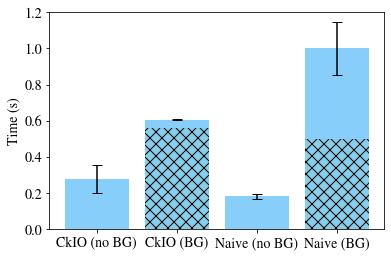

In [9]:
# PLOT FOR BG WORK WITH CKIO vs NO BG Work

data = "ckio-benchmarks/figure-results/4nodes-bgwork-fixed.out"
df = pd.read_csv(data, sep=' ', header=None, names=['nreaders', 'nbc', 'npes', 'nnodes', 'filesize', 'bgtime', 'time'])

naivedata = "ckio-benchmarks/figure-results/4nodes-bgwork-naive.out"
naivedf = pd.read_csv(naivedata, sep=' ', header=None, names=['nreaders', 'npes', 'nnodes', 'filesize', 'bgtime', 'time'])

fig, ax = plt.subplots()

# select based on the following parameters
pes = 8
filesize=1024
readers=8
nodes=8

# select and group by
# plot
bg_work = df[df['bgtime'] > 0]
no_bg = df[df['bgtime'] == 0]

naive_bg = naivedf[naivedf['bgtime'] > 0]
naive_nobg = naivedf[naivedf['bgtime'] == 0]

naive_bg_time = naive_bg.groupby(['npes']).mean()['time'].values[0] - naive_bg.groupby(['npes']).mean()['bgtime'].values[0]
naive_bg_stdev = naive_bg.groupby(['npes']).std()['time'].values[0]
naive_nobg_time = naive_nobg.groupby(['npes']).mean()['time'].values[0]
naive_nobg_stdev = naive_nobg.groupby(['npes']).std()['time'].values[0]

print(naive_bg_time)

filtered_bg = bg_work.groupby(['nbc']).mean()['time'].values[0] - bg_work.groupby(['nbc']).mean()['bgtime'].values[0]
bg_stdev = bg_work.groupby(['nbc']).std()['time'].values[0]
filtered_no = no_bg.groupby(['nbc']).mean()['time'].values[0]
no_stdev = no_bg.groupby(['nbc']).std()['time'].values[0]

ckio_bg_time = bg_work.groupby(['nbc']).mean()['bgtime'].values[0]
naive_bg_time = naive_bg.groupby(['npes']).mean()['bgtime'].values[0]

categories = ['CkIO (no BG)', 'CkIO (BG)', 'Naive (no BG)', 'Naive (BG)']


vals = [filtered_no, filtered_bg, naive_nobg_time, naive_bg_time]
bg = [0, ckio_bg_time, 0, naive_bg_time]
stdevs = [no_stdev, bg_stdev, naive_nobg_stdev, naive_bg_stdev]

ax.bar(categories, bg, color='skyblue', hatch='xx')
ax.bar(categories, vals, bottom=bg, yerr=stdevs, capsize=5, color='lightskyblue')

ax.set_ylabel('Time (s)')

plt.savefig('fixed-bg.pdf', bbox_inches='tight')

[0.299867, 0.26919066666666663, 0.247132, 0.24872766666666668, 0.24462833333333334, 0.24011366666666667, 0.24025566666666667, 0.2412966666666667, 0.237143, 0.2311835]
[0.024370999999999976, 0.02506866666666674, 0.02643466666666669, 0.0297283333333333, 0.03275699999999998, 0.035642666666666656, 0.048695666666666665, 0.04891266666666663, 0.05529250000000002, 0.065998]
10


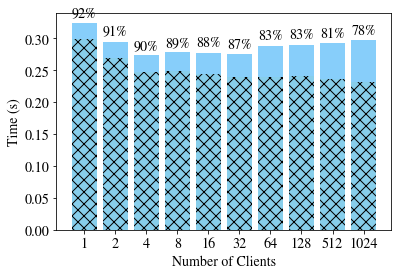

In [3]:
# PLOT FOR BG WORK as CLIENTS VARY
data = "ckio-benchmarks/figure-results/4nodes-bgwork-varyclients.out"
df = pd.read_csv(data, sep=' ', header=None, names=['nreaders', 'nbc', 'npes', 'nnodes', 'filesize', 'bgtime', 'time'])

fig, ax = plt.subplots()

# select based on the following parameters
pes = 8
filesize=1024
nodes=8

values = []
bgtimes = []
stdevs = []
totaltimes = []
percents = []
for readers in [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024]:
    readers = readers * 8
    filtered = df[df['nreaders'] == readers].groupby(['nbc']).mean()
    stdev = df[df['nreaders'] == readers].groupby(['nbc']).std()
    
    bgtime = filtered['bgtime'].values[0]
    totaltime = filtered['time'].values[0]
    leftover = totaltime - bgtime
    percent = bgtime / totaltime

    values.append(leftover)
    bgtimes.append(bgtime)
    stdevs.append(stdev['time'].values[0])
    totaltimes.append(totaltime)
    percents.append(percent)
    

categories = ['1', '2', '4', '8', '16', '32', '64', '128', '512', '1024']
print(bgtimes)
print(values)


plt.bar(categories, bgtimes, color='skyblue', hatch='xx')
plt.bar(categories, values, bottom=bgtimes, color='lightskyblue')
plt.xlabel('Number of Clients')
plt.ylabel('Time (s)')


# add label to top of bars with total time
print(len(categories))
for i in range(len(categories)):
    plt.text(i, bgtimes[i] + values[i] + 0.01, f"{percents[i]*100:.0f}%", ha='center')
    
# save as pdf
plt.savefig('bgwork-varyclients.pdf', format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Time (s)')

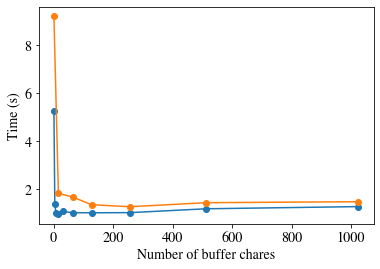

In [4]:
# PLOT BUFFER CHARES AGAINST TIME
data = "ckio-benchmarks/output.txt"
df = pd.read_csv(data, sep=' ', header=None, names=['nreaders', 'nbc', 'npes', 'nnodes', 'filesize', 'bgtime', 'time'])

fig, ax = plt.subplots()

for readers in [1, 1024]:
    # select based on the following parameters
    pes = 1
    nodes = 1
    filesize = 1024

    # select and group by
    # plot
    filtered = df[(df['nreaders'] == readers) & (df['npes'] == pes) & (df['nnodes'] == nodes) & (df['filesize'] == filesize)].groupby(['nbc']).mean()
    ax.plot(filtered.index, filtered['time'], marker='o', label='Time')

ax.set_xlabel('Number of buffer chares')
ax.set_ylabel('Time (s)')
